In [1]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
dataset = pd.read_table('/content/Restaurant_Reviews.tsv')
dataset
# Here 1 is positive review
# Here 0 is negative review

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
# This provides summary of our dataframe.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
# This returns the rows and columns as the values of dimensions in the form of tuple.
dataset.shape

(1000, 2)

In [5]:
dataset.isnull().sum()   # To check if there are any empty cells

Review    0
Liked     0
dtype: int64

In [6]:
dataset['Liked'].value_counts()    # Returns the count of positive and negative reviews

1    500
0    500
Name: Liked, dtype: int64

In [7]:
x = dataset['Review'].values
y = dataset['Liked'].values

In [8]:
x

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.',
       'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
       'The selection on the menu was great and so were the prices.',
       'Now I am getting angry and I want my damn pho.',
       "Honeslty it didn't taste THAT fresh.)",
       'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
       'The fries were great too.', 'A great touch.',
       'Service was very prompt.', 'Would not go back.',
       'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
       'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!',
       'I was disgusted because I was pretty sure that was human hair.',
       'I was shocked because no signs indicate cash only.',
       'Highly recommended.', 'Waitress was a little slow in service.'

In [9]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

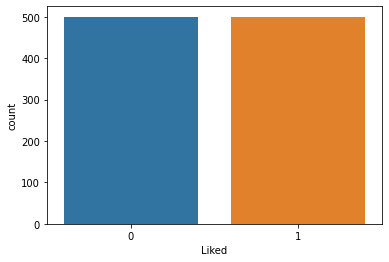

In [10]:
# Visualizing the number of reviews using the count plot from seaborn library
import seaborn as sns
sns.countplot(x='Liked',data=dataset)

In [11]:
# Creating 'Text length' column to see if there are some valuable texts
dataset['Text length']=dataset['Review'].apply(len)

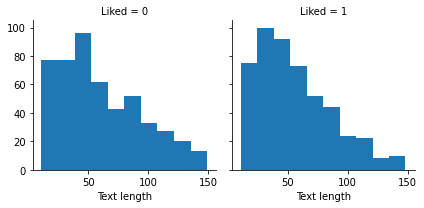

In [12]:
# Visualizing the length of text using FacetGrid from Seaborn
graph = sns.FacetGrid(data=dataset,col='Liked')
graph.map(plt.hist,'Text length')
# From the graph it seems the lenght between liked and disliked reviews is similar

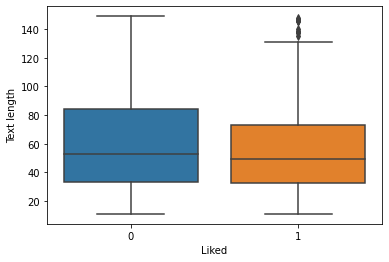

In [13]:
# Creating a boxplot comparing the text length with the number of likes and dislikes
sns.boxplot(x='Liked',y='Text length',data=dataset)

In [14]:
# Importing natural language tool kit
import nltk
# Downloading stopwords and wordnet for the lemmatizer model
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [15]:
# To clean the data
import re

# To remove stopwords
from nltk.corpus import stopwords

# For lemmatization
from nltk.stem import WordNetLemmatizer

In [16]:
# Initializing an empty array to append the clean text
corpus = []

# Cleaning 1000 rows of reviews
for i in range(0,1000):
  review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
  # Converting all the texts to lower case
  review = review.lower()
  # Split or tokenize the text
  review = review.split()
  # Creating Lemmatizer object to take main stem of each word
  lemmatizer = WordNetLemmatizer()
  # Remove all the stopwords found in the sentence and also do lemmatization
  review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  # Rejoin all the stem text in the sentence to create them back into the string by removing the tokenization
  review = ' '.join(review)
  # Append each string to create an array of clean text
  corpus.append(review)
# Print the text
corpus

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care le interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'also combo like burge

In [17]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.20)

In [18]:
# Returns values of rows and columns present in x.
x.shape

(1000,)

In [19]:
# Returns values of rows and columns present in y.
y.shape

(1000,)

In [20]:
# Returns the values of training and testing sets.
print("X Train Shape:", x_train.shape)
print("X Test Shape:", x_test.shape)
print("Y Train Shape:", y_train.shape)
print("Y Test Shape:", y_test.shape)

X Train Shape: (800,)
X Test Shape: (200,)
Y Train Shape: (800,)
Y Test Shape: (200,)


In [21]:
# Importing Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# Applying count vectorizer before doing SVM.
vect = CountVectorizer(stop_words='english', max_features=1000)
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [23]:
# Using Support Vector Machine Model
from sklearn.svm import SVC

In [24]:
# Import the SVC model
model = SVC()
model.fit(x_train_vect, y_train)

SVC()

In [25]:
# Predicted values
y_pred = model.predict(x_test_vect)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0])

In [26]:
# Actual values
y_test   

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [27]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# [[True Positive    False Positive ],
#  [False Negative    True Negative]]

[[90  7]
 [43 60]]


In [28]:
# Calculating the accuracy of SVC model.
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.75

In [29]:
# Pipeline model using Count Vectorizer and SVC
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(CountVectorizer(), SVC())
text_model.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [30]:
y_pred = text_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1])

In [31]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [32]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[78 19]
 [23 80]]


In [33]:
# Calculating the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.79

In [34]:
# Using naive bayes algorithm creating a NB model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_vect, y_train)

MultinomialNB()

In [35]:
y_pred = model.predict(x_test_vect)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [36]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [37]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[68 29]
 [23 80]]


In [38]:
# Calculating the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.74

In [39]:
# Using pipeline method using Count Vectorizer and Naive Bayes
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(CountVectorizer(),MultinomialNB())
text_model.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [40]:
y_pred = text_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1])

In [41]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [42]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[81 16]
 [22 81]]


In [43]:
# Calculating the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.81

In [44]:
# Importing the joblib model
import joblib
joblib.dump(text_model,'Rest-Rev')  # storing the best accurate data in the file named Rest-Rev 

['Rest-Rev']

In [45]:
# Reconstructing a python object from a file persisted with joblib.dump
import joblib
text_model = joblib.load('Rest-Rev')

In [46]:
# Predicting the output of a new review which is positive in this case.
text_model.predict(['The food is amazing!!'])

array([1])

In [47]:
# Predicting the output of a new review which is negative in this case.
text_model.predict(['The cooking is really bad and I have never eaten much worse food than this...'])

array([0])

In [48]:
# Installing streamlit.
!pip install -q streamlit

     |████████████████████████████████| 9.7 MB 4.6 MB/s 
     |████████████████████████████████| 4.3 MB 34.7 MB/s 
     |████████████████████████████████| 164 kB 56.8 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 180 kB 62.4 MB/s 
     |████████████████████████████████| 111 kB 65.5 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 128 kB 31.7 MB/s 
     |████████████████████████████████| 792 kB 20.9 MB/s 
     |████████████████████████████████| 380 kB 57.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.27 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.9.0 which is incompatible.
google-colab 1.0.0 requires ipytho

In [49]:
%%writefile app.py
# Importing streamlit and joblib
import streamlit as st
import joblib
# Creating a streamlit webapp using the joblib model
st.title('Restaurant Reviews')             # title for the web app
text_model = joblib.load('Rest-Rev')       # loading restaurant reviews joblib model
ip = st.text_input('Enter your review:')   # user input
op = text_model.predict([ip])              # use the input text entered by the user and predict if the review is positive or negative using the joblib model
if st.button('Predict'):                   # creating a button which displays the output once we click on it
  st.title(op[0])                          # print the output

Writing app.py


In [ ]:
# Running app.py
!streamlit run app.py & npx localtunnel --port 8501

2022-02-08 17:26:39.861 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 6.938s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.201.184.192:8501

your url is: https://pretty-bobcat-82.loca.lt
